# Train CNN with MFCCs


## cnn_mfccs


Inspired by https://medium.com/@diego-rios/speech-emotion-recognition-with-convolutional-neural-network-ae5406a1c0f7


Import the necessary libraries


In [1]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
import os
import sys
import numpy as np
import random

In [2]:
# Get the absolute path to the project root without relying on __file__
notebook_path = os.getcwd()  # Gets current working directory
project_root = os.path.abspath(os.path.join(notebook_path, "../../.."))
sys.path.insert(0, project_root)

In [3]:
print(torch.__version__)
print(torch.cuda.is_available())

2.1.1+cu118
True


Set the seed for reproducibility


In [4]:
random_seed = 42

torch.manual_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)

if (torch.cuda.is_available()):
    torch.cuda.manual_seed(random_seed)

Set some constant strings


In [5]:
model_name = 'cnn_mfccs_zero'

train_csv = '../../../data/mfcc_train_dataset.csv'
test_csv = '../../../data/mfcc_test_dataset.csv'
val_csv = '../../../data/mfcc_val_dataset.csv'
root_dir = '../../../data/'
class_weights_path = '../../../data/class_weights.pt'

Import other helper classes


In [6]:
from cnn.datasets.MfccDataset import MFCCDataset
from cnn.pipeline.Pipeline import Pipeline

Import the model


In [7]:
from cnn.models.architectures.CNNMFCCs import CNNMFCCs

model = CNNMFCCs()

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

CNNMFCCs(
  (conv1): Conv1d(40, 16, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv2): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv3): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv4): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (dropout): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=22016, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=9, bias=True)
)

Visualize the model


In [8]:
summary(model, (40, 172))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 16, 172]           1,936
            Conv1d-2              [-1, 32, 172]           1,568
            Conv1d-3              [-1, 64, 172]           6,208
            Conv1d-4             [-1, 128, 172]          24,704
           Dropout-5             [-1, 128, 172]               0
            Linear-6                  [-1, 128]       2,818,176
           Dropout-7                  [-1, 128]               0
            Linear-8                   [-1, 64]           8,256
            Linear-9                    [-1, 9]             585
Total params: 2,861,433
Trainable params: 2,861,433
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.03
Forward/backward pass size (MB): 0.49
Params size (MB): 10.92
Estimated Total Size (MB): 11.43
-------------------------------------

Define the learning rate, criterion, optimizer, transformations, and number of epochs


In [9]:
learning_rate = 0.001

class_weights = torch.load(class_weights_path).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Define transformations
transform = transforms.Compose([])

num_epochs = 100

Prepare datasets and dataloaders


In [10]:
trainset = MFCCDataset(
    csv_file=train_csv, root_dir=root_dir, transform=transform)
valset = MFCCDataset(
    csv_file=val_csv, root_dir=root_dir, transform=transform)
testset = MFCCDataset(
    csv_file=test_csv, root_dir=root_dir, transform=transform)

trainloader = DataLoader(trainset, batch_size=128,
                         shuffle=True, num_workers=8, pin_memory=True)
valloader = DataLoader(valset, batch_size=128,
                       shuffle=False, num_workers=8, pin_memory=True)
testloader = DataLoader(testset, batch_size=128,
                        shuffle=False, num_workers=8, pin_memory=True)

Execute the pipeline


Mapping from Emotion to Number: {'Anger': 0, 'Bored': 1, 'Disgust': 2, 'Fear': 3, 'Happy': 4, 'Neutral': 5, 'Question': 6, 'Sad': 7, 'Surprise': 8}
Model is on: cuda:0
Epoch 1/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 65.32it/s, Loss=1.2754857540130615, Elapsed=1.3681s, ETA=0.0000s]


Epoch 1 completed in 6.7057s
Train Loss: 1.422403647031398 - Train Accuracy: 36.885190294204115
Validation Loss: 1.1983766492207846 - Validation Accuracy: 46.55972984381596

Epoch 2/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 64.81it/s, Loss=1.2921589612960815, Elapsed=1.3746s, ETA=0.0000s]


Epoch 2 completed in 7.0185s
Train Loss: 1.1456926950829567 - Train Accuracy: 48.164899029872686
Validation Loss: 1.0995898063977558 - Validation Accuracy: 51.17138032925285

Epoch 3/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 68.50it/s, Loss=1.1063172817230225, Elapsed=1.3275s, ETA=0.0000s]


Epoch 3 completed in 6.5300s
Train Loss: 1.0532550053789436 - Train Accuracy: 52.0861129327695
Validation Loss: 1.0232955892880757 - Validation Accuracy: 54.7593921485859

Epoch 4/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 66.67it/s, Loss=1.2340222597122192, Elapsed=1.3160s, ETA=0.0000s]


Epoch 4 completed in 6.6441s
Train Loss: 0.9866873587487061 - Train Accuracy: 55.04172225865539
Validation Loss: 1.006748989423116 - Validation Accuracy: 53.704094554664415

Epoch 5/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 72.23it/s, Loss=1.5380593538284302, Elapsed=1.2359s, ETA=0.0000s]


Epoch 5 completed in 6.5793s
Train Loss: 0.9381217245077123 - Train Accuracy: 56.76036272359286
Validation Loss: 1.0023117129007975 - Validation Accuracy: 54.822710004221186

Epoch 6/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 64.74it/s, Loss=1.1908841133117676, Elapsed=1.3478s, ETA=0.0000s]


Epoch 6 completed in 6.3257s
Train Loss: 0.8940849893354956 - Train Accuracy: 58.63729902082721
Validation Loss: 0.966062893072764 - Validation Accuracy: 57.1021528070916

Epoch 7/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 67.50it/s, Loss=1.4470707178115845, Elapsed=1.3280s, ETA=0.0000s]


Epoch 7 completed in 6.3787s
Train Loss: 0.8501078309006773 - Train Accuracy: 60.532326270324056
Validation Loss: 0.9848130281766255 - Validation Accuracy: 58.315745040101305

EarlyStopping counter: 1/7
Epoch 8/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 64.33it/s, Loss=1.4080291986465454, Elapsed=1.3587s, ETA=0.0000s]


Epoch 8 completed in 6.3416s
Train Loss: 0.8095344361886813 - Train Accuracy: 62.092670902964656
Validation Loss: 0.9560677448908488 - Validation Accuracy: 60.0886449978894

Epoch 9/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 61.96it/s, Loss=1.2547211647033691, Elapsed=1.4035s, ETA=0.0000s]


Epoch 9 completed in 6.6855s
Train Loss: 0.7662280744555369 - Train Accuracy: 63.95603898600213
Validation Loss: 0.9402947235107422 - Validation Accuracy: 58.71675812579147

Epoch 10/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 71.27it/s, Loss=1.2545801401138306, Elapsed=1.2637s, ETA=0.0000s]


Epoch 10 completed in 6.5423s
Train Loss: 0.7312550021906119 - Train Accuracy: 65.4033151670021
Validation Loss: 0.983814628124237 - Validation Accuracy: 60.83790628957366

EarlyStopping counter: 1/7
Epoch 11/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 63.78it/s, Loss=1.31801438331604, Elapsed=1.3689s, ETA=0.0000s]  


Epoch 11 completed in 6.5475s
Train Loss: 0.6923358026095209 - Train Accuracy: 66.7985798602474
Validation Loss: 0.9489863634109497 - Validation Accuracy: 61.756015196285354

EarlyStopping counter: 2/7
Epoch 12/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 62.81it/s, Loss=1.3580293655395508, Elapsed=1.3895s, ETA=0.0000s]

Epoch 12 completed in 6.4446s
Train Loss: 0.6512715056796984 - Train Accuracy: 68.82928925171299
Validation Loss: 0.9932919303576152 - Validation Accuracy: 60.72182355424229

EarlyStopping counter: 3/7
Epoch 13/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 65.04it/s, Loss=1.2436496019363403, Elapsed=1.3513s, ETA=0.0000s]

Epoch 13 completed in 6.6190s
Train Loss: 0.6144867759047216 - Train Accuracy: 70.04138305330046
Validation Loss: 1.078372246424357 - Validation Accuracy: 60.95398902490502

EarlyStopping counter: 4/7
Epoch 14/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 69.42it/s, Loss=1.5542209148406982, Elapsed=1.3010s, ETA=0.0000s]


Epoch 14 completed in 6.2975s
Train Loss: 0.5746891198819772 - Train Accuracy: 71.56780715044889
Validation Loss: 1.0695494206746419 - Validation Accuracy: 62.42085268045589

EarlyStopping counter: 5/7
Epoch 15/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 64.44it/s, Loss=1.1816174983978271, Elapsed=1.3786s, ETA=0.0000s]

Epoch 15 completed in 6.3381s
Train Loss: 0.5439245004874433 - Train Accuracy: 73.01282196241604
Validation Loss: 1.079892558256785 - Validation Accuracy: 62.18868720979316

EarlyStopping counter: 6/7
Epoch 16/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 59.88it/s, Loss=1.3302021026611328, Elapsed=1.4659s, ETA=0.0000s]


Epoch 16 completed in 6.4018s
Train Loss: 0.5135836335964975 - Train Accuracy: 74.42165486985822
Validation Loss: 1.1259275833765665 - Validation Accuracy: 63.222878851836214

EarlyStopping counter: 7/7
🔁 Early stopping triggered!


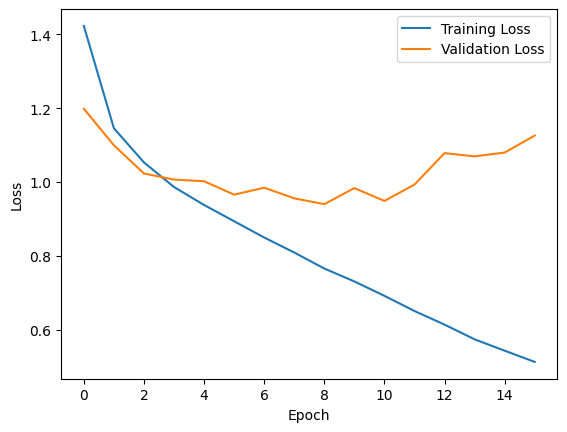

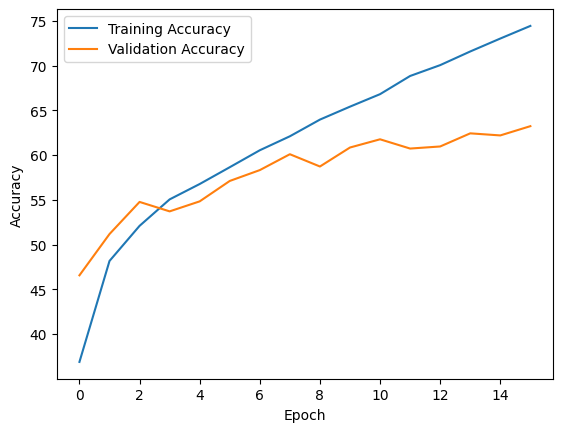

Evaluating best model on test set...


Testing: 100%|██████████| 75/75 [00:01<00:00, 45.68it/s]


Test Accuracy: 0.6229
Test Precision: 0.6434
Test Recall: 0.6229
Test F1-score: 0.6223

              precision    recall  f1-score   support

       Anger       0.69      0.66      0.67       916
       Bored       0.63      0.83      0.72      1098
     Disgust       0.42      0.53      0.47       291
        Fear       0.31      0.65      0.42       308
       Happy       0.71      0.49      0.58      1914
     Neutral       0.62      0.54      0.57      2226
    Question       0.72      0.78      0.75      1139
         Sad       0.71      0.54      0.61       857
    Surprise       0.55      0.77      0.64       728

    accuracy                           0.62      9477
   macro avg       0.60      0.64      0.60      9477
weighted avg       0.64      0.62      0.62      9477



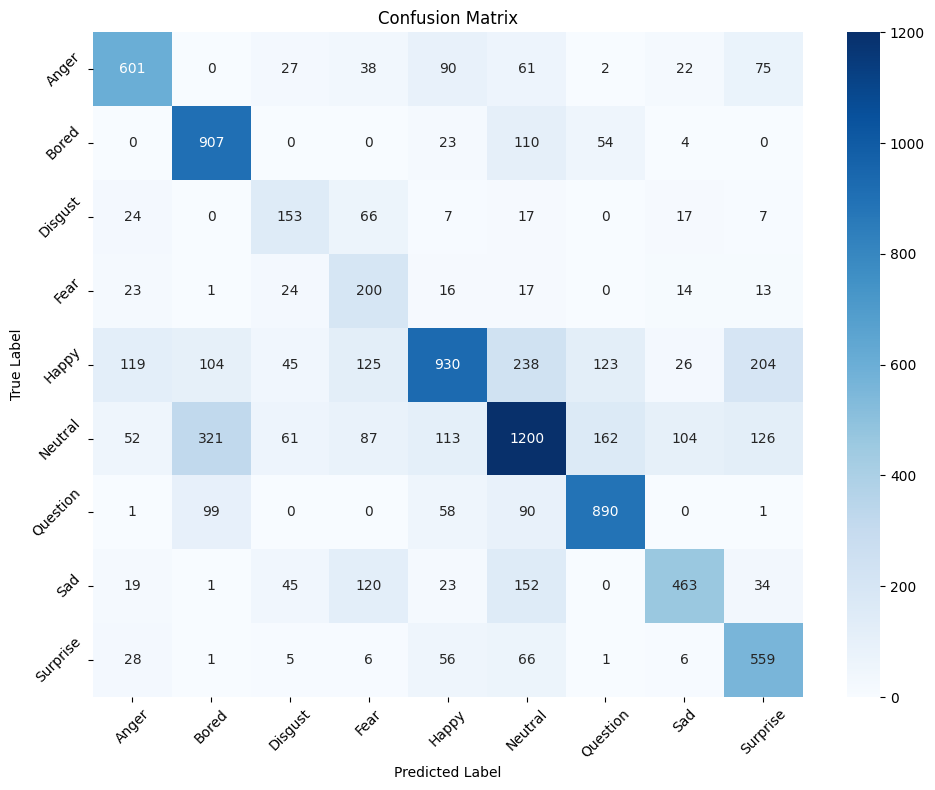

In [11]:
Pipeline.execute(
    model=model,
    labelmap=trainset.label_map,
    trainloader=trainloader,
    valloader=valloader,
    testloader=testloader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=num_epochs,
    model_name=model_name,
    patience=7
)